## 미세 조정(Fine-tuning)
- 딥 러닝에서 미세조정은 사전 훈련된 모델의 가중치가 새로운 데이터에 대해 훈련되는 전이 학습에 대한 접근 방식
- 사전학습 된 모델에 추가로 개별과제의 맞는 새로운 레이어를 추가하여 이미 학습된 모델의 가중치 전체 또는 일부를 미세하게 조정하는 학습 방법

# BERT(Bidirectional Encoder Representations from Transformers)
- 2018년에 구글이 공개한 사전 훈련된 모델
- 트랜스포머에서 인코더만을 사용하고 활성화 함수로 GELU 를 사용
- 양방향으로 정보를 처리하는 트랜스포머 기반의 언어 모델
- 다양한 종류의 자연어 처리 과제에서 전이학습을 쉽게 할수 있도록 설계
- BERT의 사전 학습
    - MLM(Masked Language Model)
    - NSP(Next Sentence Prediction)


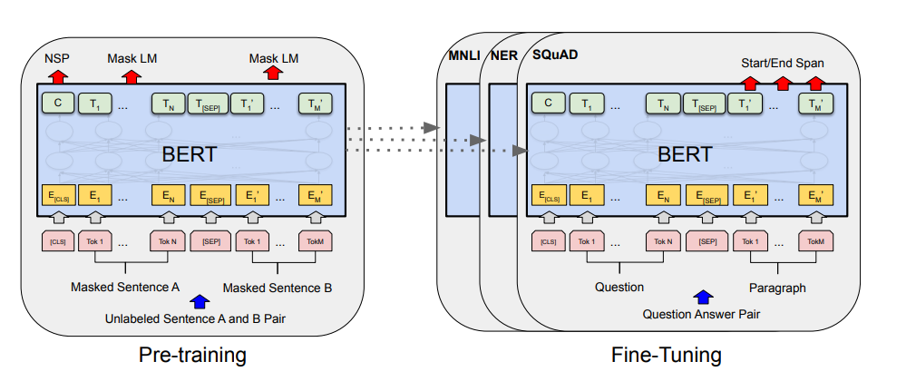

- Gaussian Error Linear Units
    - 정규분포의 누적분포함수로 0 주위를 부드럽게 변화해준다.

$$
\text{GELU}\left(x\right) = x * \Phi\left(x\right)
$$


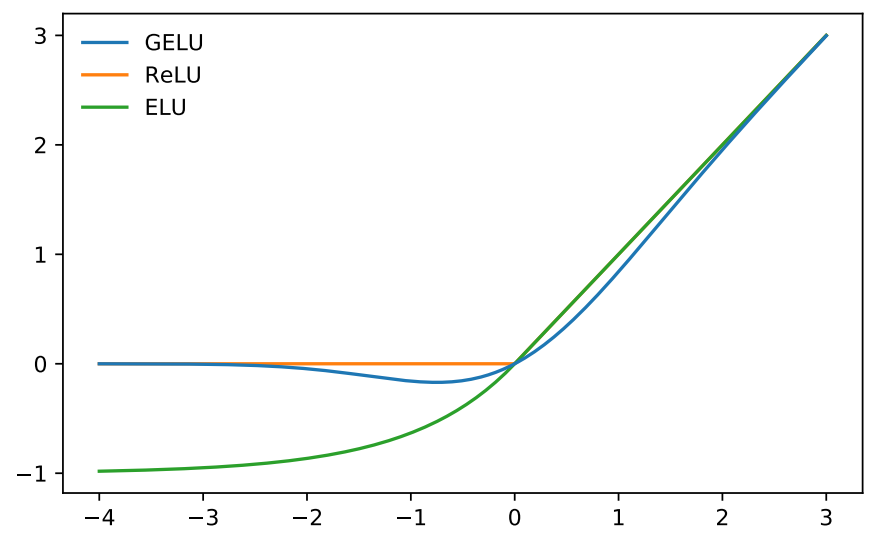

## BERT Architecture
- Multi-layer bidirectional Transformer encoder
    - L: number of layers
    - H: hidden size
    - A: number of self-attention heads
- BERT base
    - L=12, H=768, A=12
    - Total Parameters = 110M
- BERT large
    - L=24, H=1024, A=16
    - Total Parameters = 340M


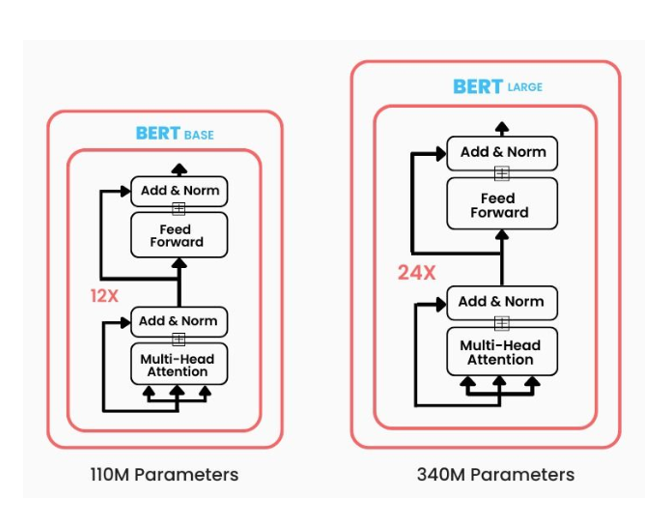

## BERT input representation
- Token embeddings
    - [CLS]: 분류 문제를 위한 특수 토큰
    - [SEP]: 문장 구분을 위한 특수 토큰
- Segmentation embeddings
    - 문장을 구분하기 위한 임베딩
- Position embeddings
    - 위치 정보를 위한 임베딩


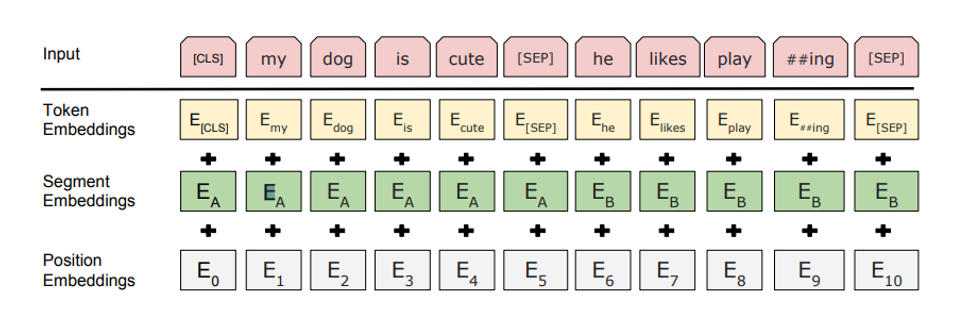

## WordPiece tokenization
- Google 에서 BERT를 사전 학습하기 위해 개발한 토큰화 알고리즘
- 단어를 더 작은 단위로 쪼개는 준 단어 토큰화
    - 글자 단위에서 준 단어로 병합해 나가는 방식으로 vocabulary를 만드는 토큰화
- BPE(Byte Pair Encoding)와 유사한 알고리즘
- BPE 와 다르게 우도(likelihood)를 높이는 조합을 찾음


### BEP 알고리즘(Byte Pair Encoding)
- Vocabulary 생성 -> Vocabulary을 이용한 토큰화
- BEP 사전생성 순서​
    - 1단계. 주어진 모든 문장들을 토큰화​
    - 2단계. 토큰의 각 문자로 초기 Vocabulary 생성​
    - 3단계. 가장 많이 등장한 bi-gram 쌍을 병합 후 Vocabulary 업데이트
        - 정의한 Vocabulary 크기 만큼 반복​

- BPE 예시
    - 토큰화 실시 (토큰, 출현 빈도 수)
    ```
        [('car', 5), ('cable', 3), ('tablet', 1), ('watch', 2), ('chair', 5), ('mouse', 1)]
    ```
    - 토큰들의 문자로 기본 Vocabulary 생성​
    ```
        ['a', 'b', 'c', 'e', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't', 'u', 'w']
    ```
    - 기본 Vocabulary 기반으로 가장 많이 등장한 bi-gram 쌍을 기본 Vocabulary 에 추가​
    ```
        [ca 8, ar 5, cb 3, ... ] # ca가 8번으로 제일 많음​
    ```
    - 기본 Vocabulary 업데이트​
    ```
        ['a', 'b', 'c', 'e', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't', 'u', 'w', 'ca']
    ```
    ※ 기본 Vocabulary 크기가 정의한 크기만큼 될 때 까지

- WordPiece 에서 병합할 쌍이 선택되는 방식
$$
\frac{bigram쌍빈도}{bigram개별1빈도 \times bigram개별2빈도}
$$

## Position Embedding
- 트랜스포머에서는 포지셔널 인코딩(Positional Encoding)이라는 방법을 통해 단어의 위치 정보를 표현
- BERT는 위치 정보를 사인 함수와 코사인 함수로 만드는 것이 아닌 학습을 통해서 얻는 포지션 임베딩(Position Embedding)이라는 방법을 사용


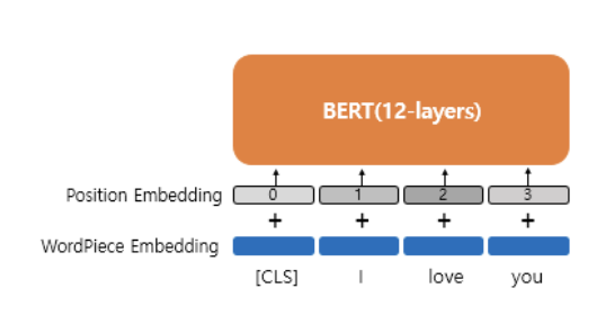

## Pre-training BERT
- Masked LM
    - 가려진 단어를 예측
- Next Sentence Prediction
    - 두 문장이 이어지는 문장인지의 여부를 예측


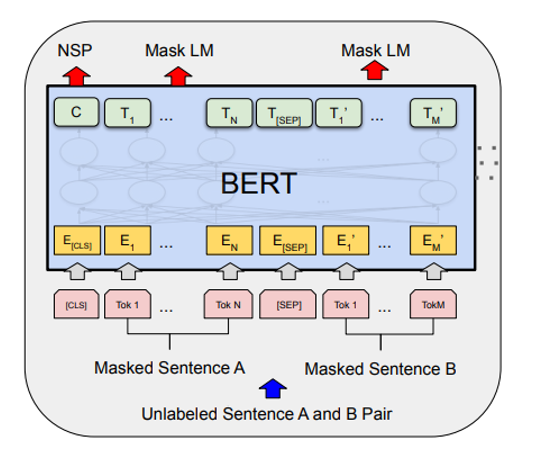

## MLM(Masked Language Model)
- 입력 토큰 중 15%를 무작위로 선택하여 마스킹(Masking)
- 가려진 토큰을 예측하도록 학습
- 무작위로 선택된 15% 토큰 중
    - 80%: [MASK] 토큰으로 대체하여 가림
    - 10%: 무작위로 다른 토큰으로 대체
    - 10%: 원래의 단어를 그대로 둠


## NSP(Next Sentence Prediction)
- 두개의 문장을 입력 받아 이어지는 문장인지 아닌지를 예측하는 방식으로 학습
- 50%는 실제로 이어지는 문장, 50%는 무작위로 이어 붙인 문장을 학습 데이터로 사용
- [CLS] 토큰의 출력 값을 통해 실제로 이어진 문장인지를 예측하도록 학습


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd() +'/data/imdb/'
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
df = pd.read_csv(f"{DATA_PATH}imdb_700.csv")
df

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


# AutoTokenizer
- from_pretrained 메서드를 사용하면 사전학습모델에서 사용된 방식으로 토큰화 할 수 있는 객체를 반환해준다.

In [4]:
from transformers import AutoTokenizer

In [5]:
model_name = "bert-base-uncased"

In [6]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

- 토크나이저 객체 주요파라미터
    - max_length
        - 문장의 최대 길이 조절
    - padding:
        - "max_length": 모델이 입력받을 수 있는 최대길이로 패딩
        - True: 배치단위로 패딩할 때 True 전달하면 된다.
    - truncation
        - True 전달할 경우 최대길이를 넘으면 자르겠다.

In [7]:
tokenizer.model_max_length

512

In [8]:
tokenizer("i love you", truncation=True , padding="max_length")

{'input_ids': [101, 1045, 2293, 2017, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
tokenizer("공부하기 싫다", truncation=True , padding="max_length")

{'input_ids': [101, 1455, 30011, 30025, 29996, 30014, 30005, 30006, 29991, 30019, 100, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
tokenizer.all_special_ids

[100, 102, 0, 101, 103]

In [11]:
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [12]:
from pprint import pprint
tmp = tokenizer(df["review"][:2].tolist())
tmp

{'input_ids': [[101, 1037, 2200, 1010, 2200, 1010, 2200, 4030, 1011, 3048, 1010, 6614, 3238, 3185, 2055, 1037, 24305, 1010, 15013, 2402, 2158, 1012, 102], [101, 2025, 2469, 2040, 2001, 2062, 2439, 1011, 1996, 4257, 3494, 2030, 1996, 4378, 1010, 3053, 2431, 1997, 3183, 2939, 2041, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [13]:
train = tokenizer(df["review"].tolist(), padding="max_length", truncation=True)

In [14]:
train.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [15]:
len(train['input_ids']), len(train['token_type_ids']), len(train['attention_mask'])

(748, 748, 748)

In [16]:
train_input_ids = np.array(train['input_ids'])
train_token_type_ids = np.array(train['token_type_ids'])
train_attention_mask = np.array(train['attention_mask'])

train_input_ids.shape, train_token_type_ids.shape, train_attention_mask.shape

((748, 512), (748, 512), (748, 512))

In [17]:
target = df["sentiment"].to_numpy().reshape(-1, 1)
target.shape

(748, 1)

# 데이터셋 클래스

In [18]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, token_type_ids, attention_mask, y=None):
        self.input_ids = input_ids
        self.token_type_ids = token_type_ids
        self.attention_mask = attention_mask
        self.y = y
    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        item = {}
        item["input_ids"] = torch.tensor( self.input_ids[idx] )
        item["token_type_ids"] = torch.tensor( self.token_type_ids[idx] )
        item["attention_mask"] = torch.tensor( self.attention_mask[idx] )

        if self.y is not None:
            item["y"] = torch.Tensor( self.y[idx] )
        return item

In [19]:
dt = ReviewDataset(train_input_ids, train_token_type_ids, train_attention_mask, target)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle =True)
batch = next( iter(dl) )
batch

{'input_ids': tensor([[ 101, 2123, 1005,  ...,    0,    0,    0],
         [ 101, 1999, 7091,  ...,    0,    0,    0]], dtype=torch.int32),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32),
 'y': tensor([[0.],
         [0.]])}

# AutoModelForSequenceClassification
- 텍스트 분류 문제에서 사용된 사전학습 모델 객체 생성할 때 사용되는 클래스

In [20]:
from transformers import AutoModelForSequenceClassification

In [21]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1 )

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [22]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [23]:
# for name, param in model.named_parameters():
#     if "beta" in name:
#         new_name = name.replace("beta", "bias_param")
#         # 파라미터 이름을 바꾸는 코드 필요 (모델의 상태 dict 등을 직접 수정해야 할 수 있음)
#     elif "gamma" in name:
#         new_name = name.replace("gamma", "scale_param")
#         # 파라미터 이름을 바꾸는 코드 필요 (모델의 상태 dict 등을 직접 수정해야 할 수 있음)


In [24]:
batch.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'y'])

In [25]:
pred = model(input_ids=batch["input_ids"],token_type_ids=batch["token_type_ids"],attention_mask= batch["attention_mask"])

In [26]:
pred.logits

tensor([[-0.1661],
        [-0.1226]], grad_fn=<AddmmBackward0>)

# 학습 loop 함수

In [27]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        pred = model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask).logits
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

# 검증 및 테스트 loop 함수

In [28]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0
    pred_list = []
    act_func = torch.nn.Sigmoid()
    model.eval() # 평가 모드
    
    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        pred = model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask).logits
        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act_func(pred) # logit 값을 확률로 변환
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

# 하이퍼파라미터 정의

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
n_splits = 5
cv = KFold(n_splits, shuffle=True, random_state=SEED)

batch_size = 16 # 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 객체
epochs = 100 # 최대 가능한 에폭수

# 학습

In [49]:
is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_input_ids) ):
    # 학습용 데이터로더 객체
    train_dt = ReviewDataset(train_input_ids[tri],train_token_type_ids[tri],train_attention_mask[tri], target[tri])
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = ReviewDataset(train_input_ids[vai],train_token_type_ids[vai],train_attention_mask[vai], target[vai])
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1).to(device)
    optimizer = torch.optim.Adam( model.parameters(), lr = 3e-5 )

    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)

        pred = (pred > 0.5).astype(int) # 이진분류 문제에서 클래스 번호 결정
        score = accuracy_score(target[vai], pred)

        patience += 1
        #print(train_loss, valid_loss, score)
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), f"{DATA_PATH}/weight/bert_model_{i}.pth") # 최고 점수 모델 가중치 저장


        if patience == 10:
            break

    print(f"{i}번째 폴드 최고 정확도: {best_score}")
    best_score_list.append(best_score)

    import gc
    del model
    gc.collect()
    torch.cuda.empty_cache()

    if is_holdout:
        break

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 정확도: 0.9666666666666667


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 정확도: 0.96


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 정확도: 0.92


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 정확도: 0.9261744966442953


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 정확도: 0.9463087248322147
